In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pl
from pandas.tools.plotting import scatter_matrix
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.image as mpimg

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

In [9]:
redWine = pd.read_csv('winequality-red.csv')
whiteWine = pd.read_csv('winequality-white.csv')

In [10]:
redWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
whiteWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
print('Number of duplicates in red wine: ' + str(np.sum(np.array(redWine.duplicated()))))
print('Number of duplicates in white wine: ' + str(np.sum(np.array(whiteWine.duplicated()))))

Number of duplicates in red wine: 240
Number of duplicates in white wine: 937


In [15]:
wine_df = redWine.append(whiteWine)
print(wine_df.shape)

(6497, 12)


In [16]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


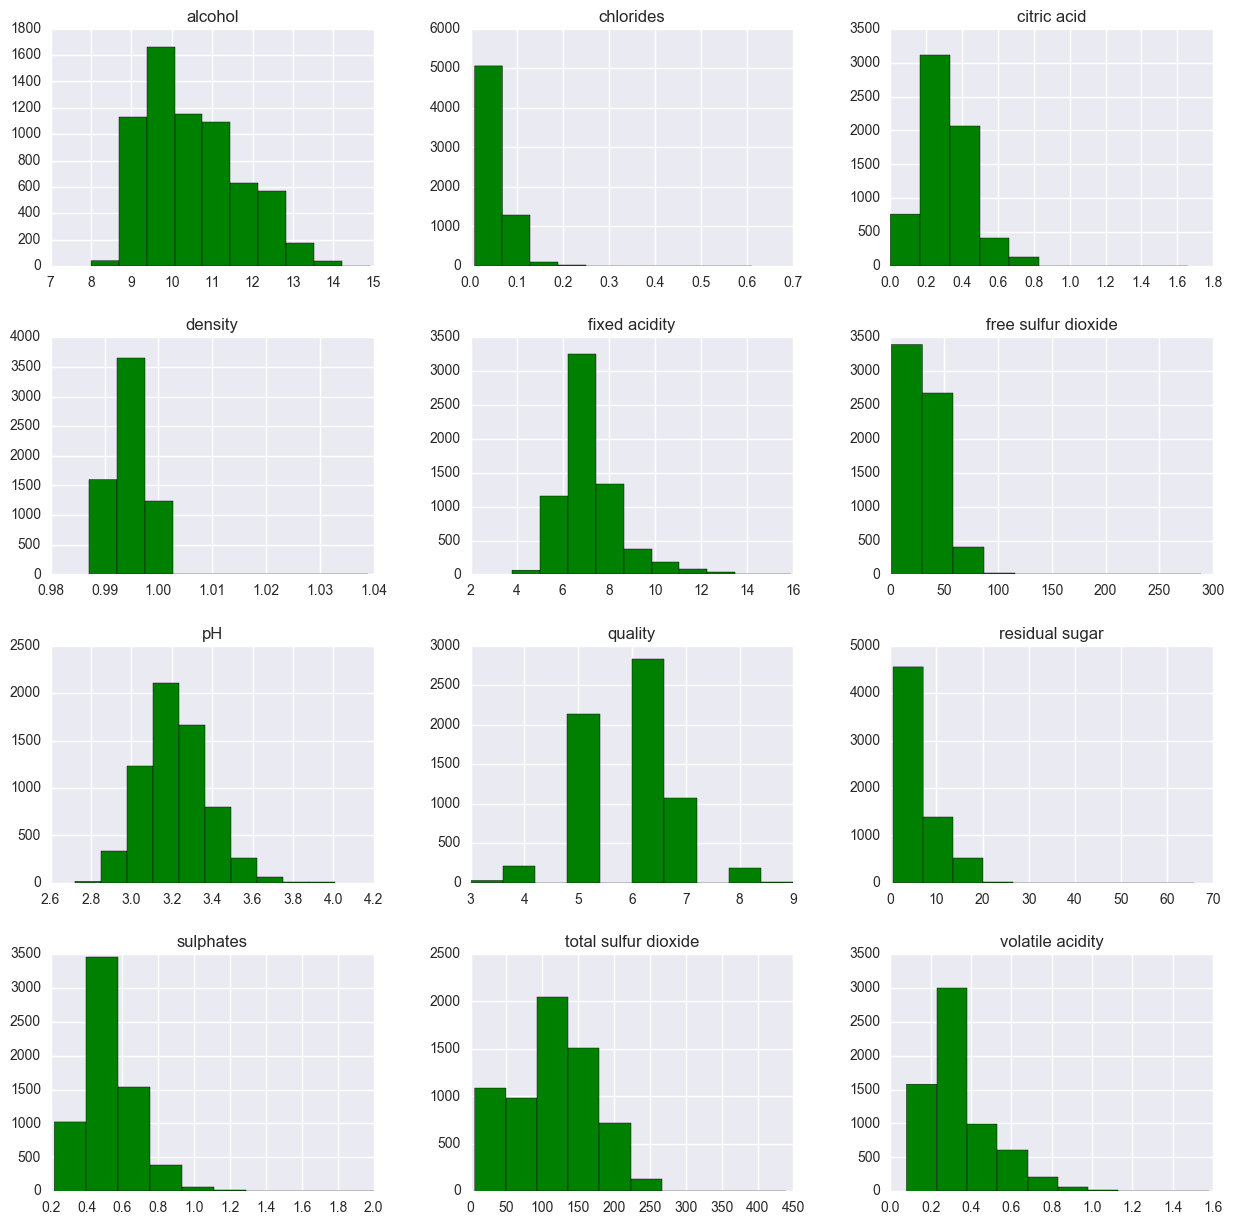

In [17]:
sns.set()
pd.DataFrame.hist(wine_df, figsize = [15,15], color='green')
plt.show()

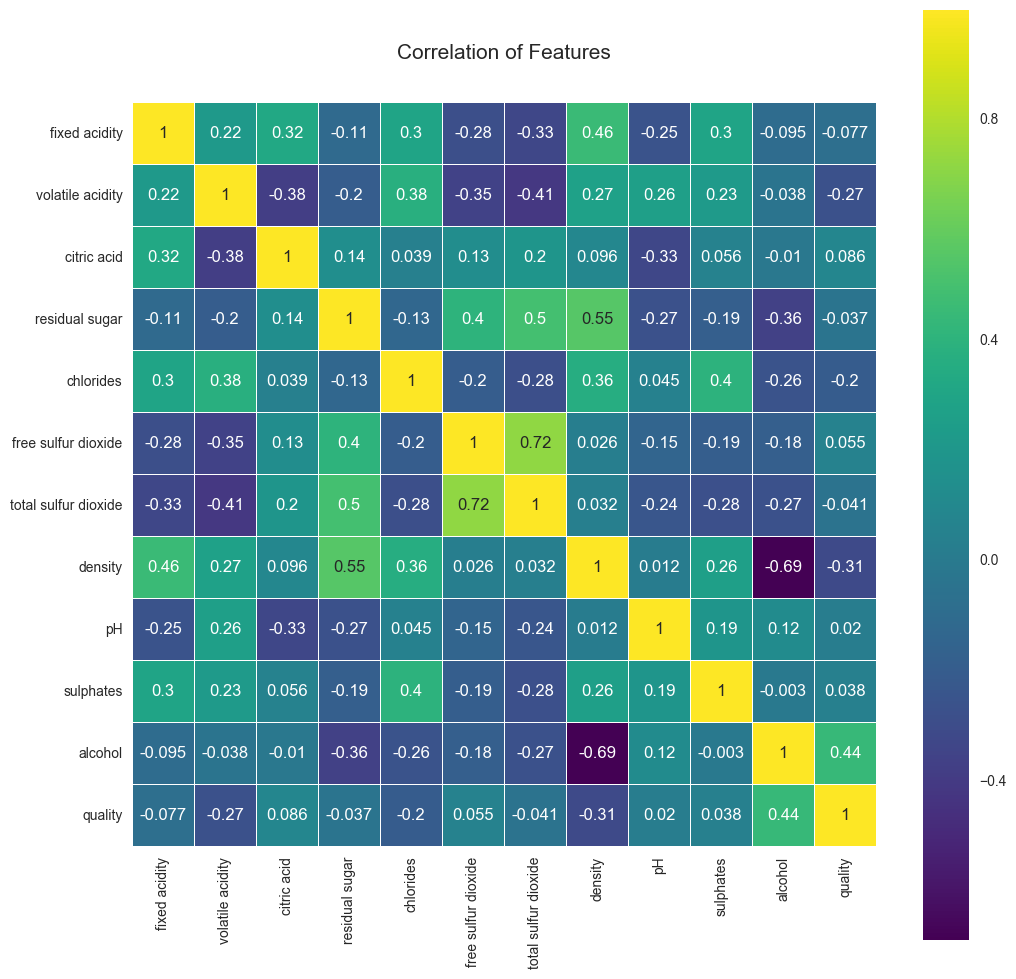

In [18]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(wine_df.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

(-1, 9)

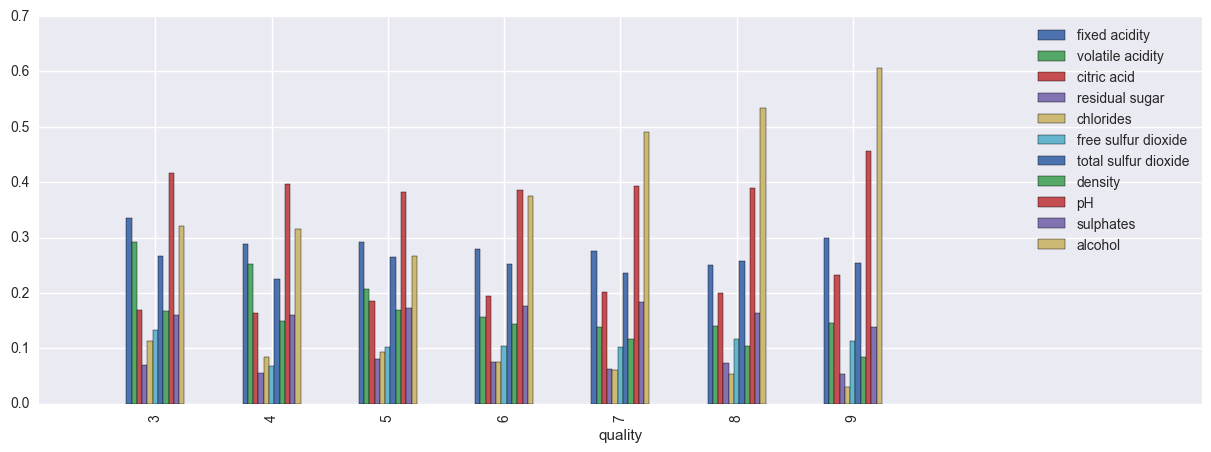

In [20]:
cols_to_scale = wine_df.columns.tolist()
cols_to_scale.remove('quality')
scaled_wine_df = wine_df
scaler = MinMaxScaler()
scaled_wine_df[cols_to_scale] = scaler.fit_transform(scaled_wine_df[cols_to_scale])
scaled_wine_df.groupby('quality').mean().plot(kind='bar', figsize=(15,5))
plt.xlim(-1,9)

In [21]:
y = wine_df['quality']
X = wine_df.drop('quality', axis=1)

In [22]:
y1 = y > 5

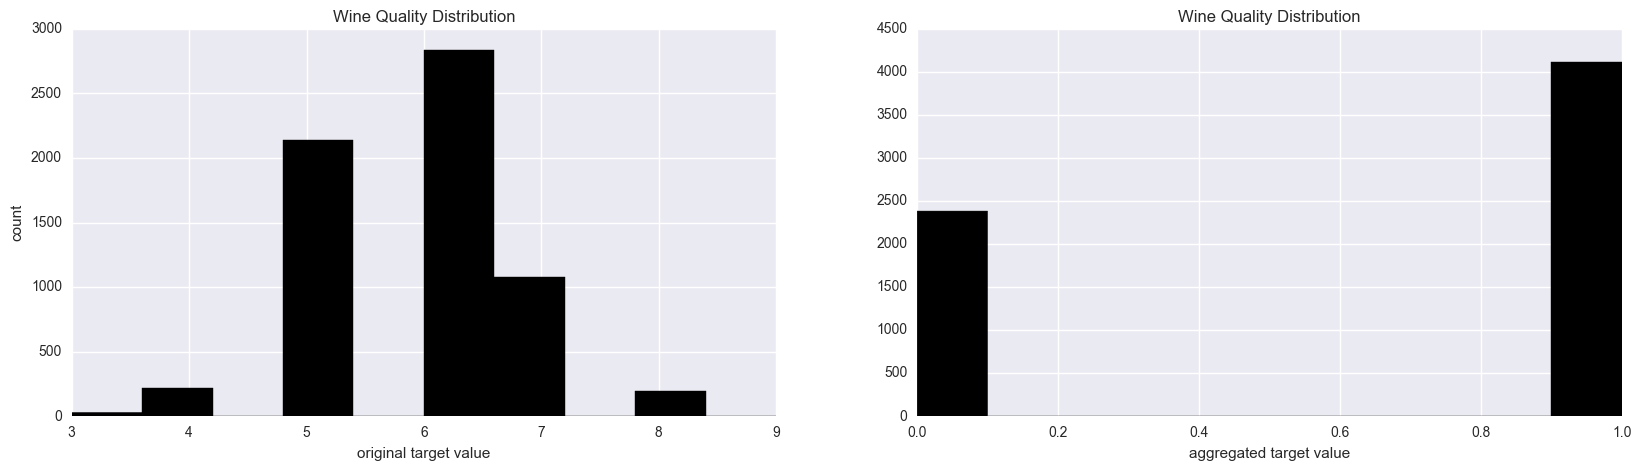

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(y, color='black')
plt.title('Wine Quality Distribution')
plt.xlabel('original target value')
plt.ylabel('count')

plt.subplot(122)
plt.title('Wine Quality Distribution')
plt.hist(y1, color = 'black')
plt.xlabel('aggregated target value')
plt.show()

In [25]:
seed = 8
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=seed)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 11), (5197,), (1300, 11), (1300,))

In [27]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM_rbf', SVC()))
models.append(('SVM_linear', SVC(kernel='linear')))

In [31]:
train_results = []
test_results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_train_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(X_train, y_train)
    cv_test_results = accuracy_score(y_test, clf.predict(X_test))
    test_results.append(cv_test_results)
    names.append(name)
    result = '%s: %f (%f) %f' % (name, cv_train_results.mean(), cv_train_results.std(), cv_test_results)
    print(result)

LR: 0.732354 (0.018129) 0.759231
RF: 0.808747 (0.019540) 0.814615
DT: 0.762376 (0.023955) 0.785385
SVM_rbf: 0.730240 (0.019208) 0.763846
SVM_linear: 0.733699 (0.019349) 0.765385


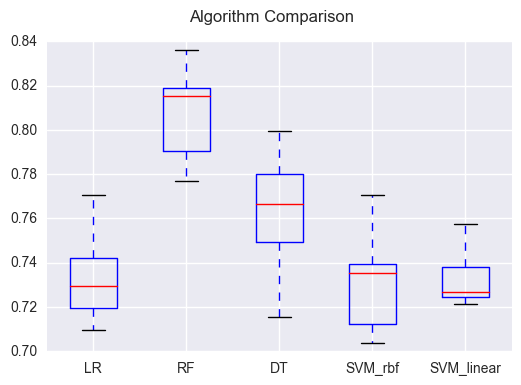

In [32]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

In [33]:
RF = RandomForestClassifier(random_state=seed)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

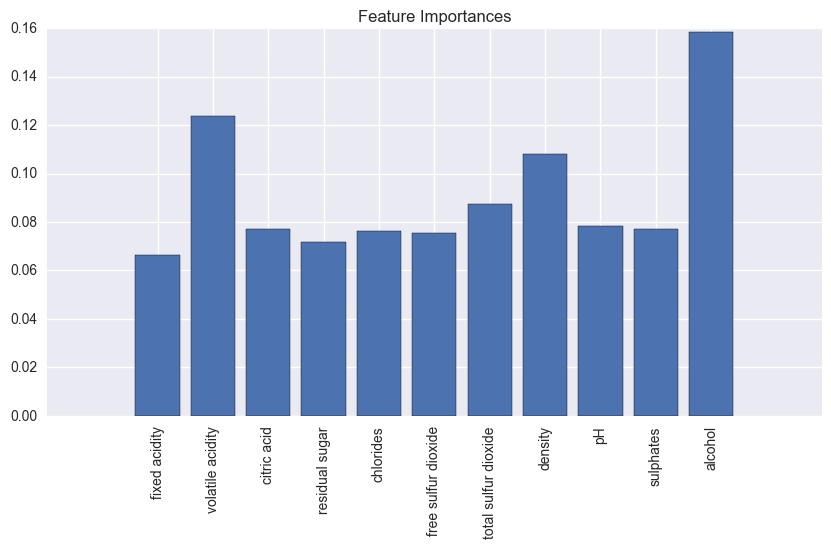

In [34]:
names = list(X_train.columns.values)
importances = RF.feature_importances_
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
y_pos = np.arange(len(names))
plt.bar(y_pos, importances, align='center')
plt.xticks(y_pos, names, rotation=90)
plt.show()

In [35]:
clf = RandomForestClassifier()
grid_values = {'max_features':['auto', 'sqrt', 'log2'], 'max_depth':[None, 10, 5, 3, 1], 'min_samples_leaf':[1,5,10,20,50]}
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
grid_clf = GridSearchCV(clf, param_grid=grid_values, cv=10, scoring='accuracy')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 5, 10, 20, 50], 'max_depth': [None, 10, 5, 3, 1], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
grid_clf.best_params_

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1}

In [38]:
clf = RandomForestClassifier(max_features='sqrt').fit(X_train, y_train)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
print('Training Accuracy ::', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy ::', accuracy_score(y_test, y_pred))

Training Accuracy :: 0.991725995767
Test Accuracy :: 0.815384615385


In [41]:
print(confusion_matrix(y_test, y_pred))

[[347  97]
 [143 713]]
